In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data():
    N = 10
    std = 0.5
    torch.manual_seed(1)
    x = torch.cat(
        (
            std * torch.randn(2, N) + torch.Tensor([[2], [-2]]),
            std * torch.randn(2, N) + torch.Tensor([[-2], [2]]),
        ),
        1,
    )
    init_c = torch.Tensor([[2, -2], [2, -2]])
    return x, init_c

In [3]:
x_data,b =load_data()

In [4]:

def k_means(X=None, init_c=None, n_iters=50):
    """K-Means.

    Argument:
        X: 2D data points, shape [2, N].
        init_c: initial centroids, shape [2, 2]. Each column is a centroid.
    
    Return:
        c: shape [2, 2]. Each column is a centroid.
    """

    if X is None:
        X, init_c = hw1_utils.load_data()
    def assign_datapoint(x, mean):
        distance = torch.tensor([])
        for i in range(mean.shape[1]):
            distance = torch.cat((torch.sqrt(torch.sum(torch.square(x.reshape(2,1)-(mean[:,i]).reshape(2,1)))).view(-1), distance))
        idx1 = torch.argsort(distance)
        return idx1[0]
    def cluster_centroid(clusters):
        mean = torch.mean(clusters, axis = 1)
        return mean
    def cost_func(cluster_1,cluster_2,c):
        cost = torch.tensor([0.0])
        for i in range(cluster_1.shape[1]):
            cost = cost + torch.sqrt(torch.sum(torch.square(c[:,0].reshape(2,1)-cluster_1[:,i].reshape(2,1))))
        for j in range(cluster_2.shape[1]):
            cost = cost + torch.sqrt(torch.sum(torch.square(c[:,1].reshape(2,1)-cluster_2[:,j].reshape(2,1))))
        return float(cost/2)
    cluster_1 = torch.tensor([])
    cluster_2 = torch.tensor([])
    c= init_c
    prev_cost = 0
    count = 1
    for i in range(n_iters):
        cluster_1 = torch.tensor([])
        cluster_2 = torch.tensor([])
        for j in range(X.shape[1]):
            idx = assign_datapoint(X[:,j].reshape(2,1),c)
            if idx ==1:
                cluster_1 = torch.cat((cluster_1,X[:,j].reshape(2,1)),1)
            else:
                cluster_2 = torch.cat((cluster_2,X[:,j].reshape(2,1)),1)
        if cluster_1.shape[0] == 0:
            mean_1 = torch.zeros([2,1]).reshape(2,1)
        else:
            mean_1 = torch.mean(cluster_1, axis = 1).reshape(2,1)
        if cluster_2.shape[0]== 0:
            mean_2 = torch.zeros([2,1]).reshape(2,1)
        else:
            mean_2 = torch.mean(cluster_2, axis = 1).reshape(2,1)
        c = torch.cat((mean_1,mean_2),1)
        cost = cost_func(cluster_1,cluster_2,c)
        if prev_cost == cost:
            print("converged"+ str(i))
            break
        else:
            prev_cost = cost
    return cluster_1,cluster_2


In [13]:
cluster_1,cluster_2 =k_means(x_data,b,100)


converged2


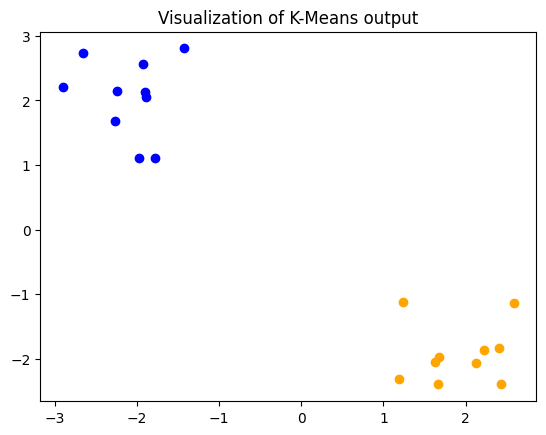

In [12]:
plt.scatter(cluster_1[0],cluster_1[1], color = "orange")
plt.scatter(cluster_2[0], cluster_2[1], color = "blue")
plt.title("Visualization of K-Means output")
plt.show()